In [2020]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2021]:
df = pd.read_csv('../data/appartements-data-db.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB


,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...


In [2022]:
#statistiques descriptives
df.describe()

,salon,nb_rooms,nb_baths,surface_area
count,1620.000000,1490.000000,1480.000000,1742.000000
mean,1.267284,2.379195,2.307432,174.933410
std,0.557539,0.667159,7.629128,2969.500693
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,71.000000
50%,1.000000,2.000000,2.000000,89.000000
75%,1.000000,3.000000,2.000000,114.750000
max,8.000000,7.000000,134.000000,123456.000000


In [2023]:
# valeurs manquantes
missing = df.isnull().sum()
print("les valeurs manquantes : \n", missing)

les valeurs manquantes : 
 title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64


In [2024]:
doublons= df.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")
print(f"Nombre de lignes : {df[doublons==True]}")
df=df.drop_duplicates()
doublons= df.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")


Nombre de doublons : 41
Nombre de lignes :                                                  title         price  \
133            Appartement à vendre 95 m² à Mohammedia  1 470 000 DH   
233             Appartement à vendre 83 m² à Bouskoura    790 000 DH   
334    Appartements moyenne standing à vendre à Tanger           NaN   
440           Appartement à vendre 217 m² à Casablanca  1 400 000 DH   
476           Appartement de rêve à vendre à Ain Atiq.      8 200 DH   
619              Appartement à vendre 115 m² à Kénitra    760 000 DH   
654              Appartement à vendre 111 m² à Kénitra    775 000 DH   
689                  Appartements à vendre à El Jadida    650 000 DH   
724                      Appartement 70 m² à Marrakech    740 000 DH   
757            Appartement de 99m² à vendre Casablanca    850 000 DH   
856    Appartement à vendre 160 m² à Casablanca Marina  3 700 000 DH   
890              Appartement à vendre 115 m² à Kénitra    760 000 DH   
925            Appart

Nombre de doublons : 0


In [2025]:
# Analyser la distribution des variables numériques.


In [2026]:
# Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations.

# Prétraitement des données

In [2027]:
df.shape

(1732, 9)

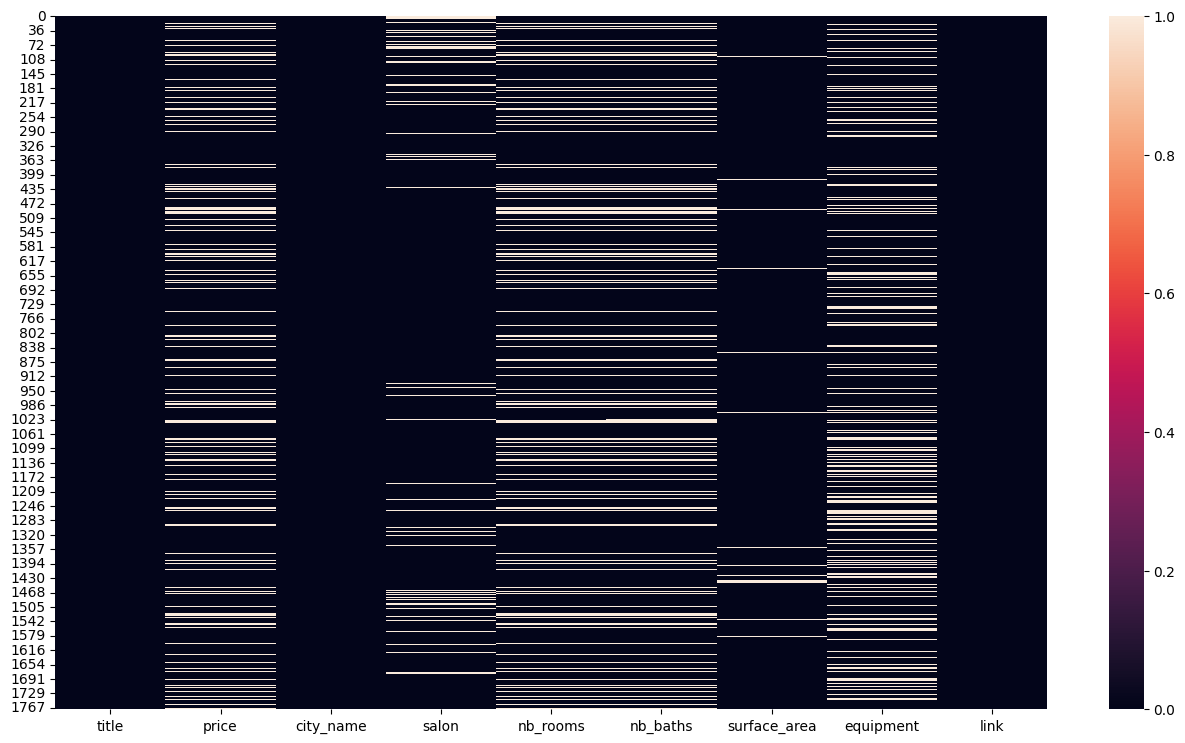

In [2028]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("../eda_img/df_null_values.png")

**Nettoyage & Transformation**

In [2029]:
#Extraire les équipements (equipment) dans des colonnes booléennes à l’aide de str.get_dummies().
if 'equipment' in df.columns : 
    equip=df["equipment"].str.get_dummies(sep='/')
    df= pd.concat([df.drop("equipment",axis=1),equip],axis=1)
print("colone avant 9 -> colonnes apres ", df.shape[1])

colone avant 9 -> colonnes apres  19


In [2030]:
df.head(2)

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,link,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,https://www.avito.ma/fr/palmier/appartements/C...,1,1,0,0,0,0,0,0,1,0,1
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,https://www.avito.ma/fr/hay_hassani/appartemen...,1,1,1,1,0,1,0,0,1,0,0


In [2031]:
#Convertir la colonne price (de type objet) en type float, en supprimant les caractères non numériques.
df["price"]= df["price"].str.replace(r'[^\d.]', '', regex=True).astype(float)
df["price"].head(2)

0    2000000.0
1    1195000.0
Name: price, dtype: float64

In [2032]:
#Supprimer les colonnes inutiles telles que equipment et link.
df=df.drop("link", axis=1)
df.head(0)

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse


In [2033]:
#Traitement de la colonne city_name. Uniformiser les noms de villes : convertir les noms en arabe vers leur équivalent français
arabic_to_french = {
    "الدار البيضاء": "Casablanca",
    "دار بوعزة": "Dar Bouazza",
    "الرباط": "Rabat",
    "مراكش": "Marrakech",
    "أصيلة": "Asilah",
    "بوسكورة": "Bouskoura",
    "القنيطرة": "Kénitra",
    "المحمدية": "Mohammedia",
    "أكادير": "Agadir",
    "تمارة الجديدة": "Tamesna",
    "سلا": "Salé",
    "حد سوالم": "Had Soualem",
    "تمارة": "Temara",
    "بن سليمان": "Benslimane",
    "طنجة": "Tanger",
    "بوزنيقة": "Bouznika",
    "مكناس": "Meknès",
    "فاس": "Fès",
    "الجديدة": "El Jadida",
    "المنصورية": "El Mansouria",
    "مرتيل": "Martil",
    "الفنيدق": "Fnideq",
    "تطوان": "Tétouan",
    "السعيدية": "Saidia",
    "النواصر": "Nouaceur",
    "تماريس": "Tamaris",
    "كابو نيكرو": "Cabo Negro",
    "سيدي علال البحراوي": "Sidi Allal El Bahraoui",
    "بني ملال": "Béni Mellal",
    "غير معروف": "Unknown",
    "الصويرة": "Essaouira",
    "المهدية": "Mehdia",
    "وجدة": "Oujda",
    "وادي لاو": "Oued Laou",
    "الدشيرة": "Dcheira",
    "سيدي رحال": "Sidi Rahal",
    "دروة": "Deroua",
    "عين عتيق": "Ain Attig",
    "آسفي": "Safi",
    "إنزكان": "Inzegan",
    "إفران": "Ifrane",
    "الداخلة": "Dakhla",
    "الدشيرة الجهادية": "Dcheïra El Jihadia",
    "تغازوت": "Taghazout",
    "سيدي بوكنادل": "Sidi Bouknadel",
    "الصخيرات": "Skhirat",
    "خريبكة": "Khouribga",
    "بركان": "Berkane",
    "مرس الخير": "Mers El Kheir",
    "برشيد": "Berrechid",
    "تيزنيت": "Tiznit",
    "أكادير ملول": "Agadir Melloul",
    "الناظور": "Nador",
    "المنزه": "El Menzeh",
    "بني أنصار": "Bni Ansar",
    "المضيق": "Mdiq",
    "تيط مليل": "Tit Mellil",
    "سوق أربعاء": "Souk El Arbaa",
    "بيوڭرى": "Biougra",
    "سطات": "Settat",
    "عين عودة": "Ain Aouda",
    "تازة": "Taza",
    "الخميسات": "Khemisset",
    "وادي زم": "Oued Zem",
    "صفرو": "Sefrou",
    "مرزوكة": "Merzouga",
    "الحاجب": "El Hajeb",
    "سلوان": "Selouane",
    "تاونات": "Taounate",
    "سيدي بنور": "Sidi Bennour",
    "القصيبة": "El Ksiba"
}
df["city_name"]= df["city_name"].replace(arabic_to_french)
# Remplacer les valeurs manquantes dans city_name par "Unknown".
df["city_name"]= df["city_name"].fillna("Unknown")

**Gestion des valeurs manquantes:**

In [2034]:
# extraire les colonnes num et categoroes
col_num= df.select_dtypes(include=['float64']).columns
col_cat= df.select_dtypes(include=["object"]).columns
print("col num: \n", col_num.tolist())
print("col cat: \n", col_cat.tolist())

col num: 
 ['price', 'salon', 'nb_rooms', 'nb_baths', 'surface_area']
col cat: 
 ['title', 'city_name']


In [2035]:
perce_null=df[col_num].isnull().sum() / df.shape[0] * 100
print("les valeurs manquantes :\n",perce_null )

les valeurs manquantes :
 price           16.050808
salon            8.833718
nb_rooms        16.050808
nb_baths        16.628176
surface_area     1.789838
dtype: float64


In [2036]:
#Pour les colonnes numériques : imputer les valeurs manquantes par la médiane.
for col in col_num : 
    df[col]=df[col].fillna(df[col].median())


In [2037]:
#Pour les colonnes catégorielles (chaînes de caractères) : imputer avec "Unknown"
for col in col_cat : 
    df[col]=df[col].fillna("Unknown")

In [2038]:
df.isnull().sum()

title              0
price              0
city_name          0
salon              0
nb_rooms           0
nb_baths           0
surface_area       0
Ascenseur          0
Balcon             0
Chauffage          0
Climatisation      0
Concierge          0
Cuisine Équipée    0
Duplex             0
Meublé             0
Parking            0
Sécurité           0
Terrasse           0
dtype: int64

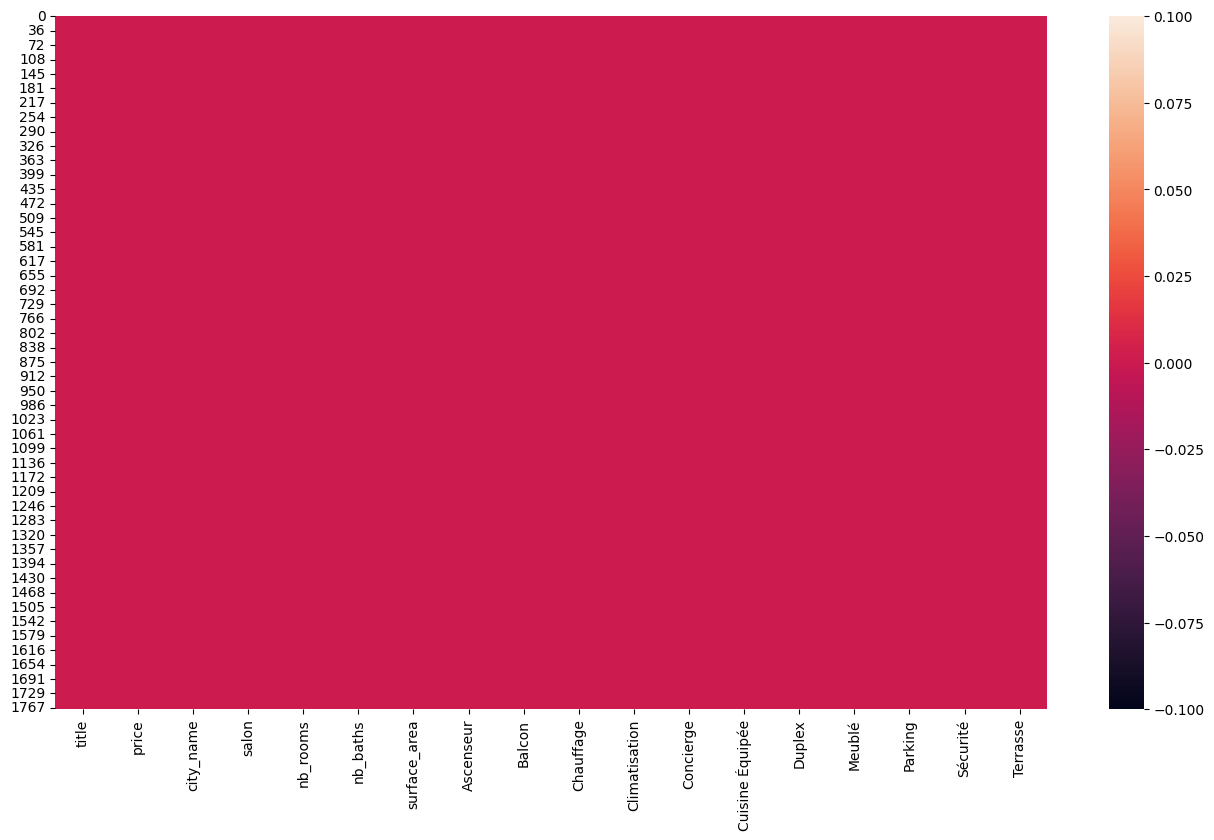

In [2039]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("../eda_img/df_after_hundel_null.png")

In [2040]:
df.describe()

,price,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
count,1.732000e+03,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000
mean,1.132807e+06,1.240185,2.320439,2.219977,175.237298,0.524827,0.569284,0.180139,0.303695,0.409931,0.505196,0.025982,0.108545,0.530600,0.506351,0.411085
std,1.173942e+06,0.535339,0.628220,6.779740,2978.059535,0.499527,0.495319,0.384414,0.459985,0.491963,0.500117,0.159126,0.311157,0.499207,0.500104,0.492173
min,3.500000e+01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000e+05,1.000000,2.000000,1.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.900000e+05,1.000000,2.000000,2.000000,88.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.300000e+06,1.000000,3.000000,2.000000,114.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2.400000e+07,8.000000,7.000000,134.000000,123456.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Détection et suppression des valeurs aberrantes:**

In [2041]:
# Utiliser des méthodes statistiques (boîtes à moustaches, z-score, IQR) pour détecter les outliers.
# Supprimer les lignes contenant des valeurs aberrantes sur des colonnes clés (ex: price, surface_area, etc.).

def find_remove_outliers(dataframe, column):
  
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    min_val = Q1 - 1.5 * IQR
    max_val = Q3 + 1.5 * IQR

    initial_rows = len(dataframe)
    outliers_condition = (dataframe[column] < min_val) | (dataframe[column] > max_val)
    print(f"Nombre de valeurs aberrantes détectées dans '{column}': {outliers_condition.sum()}")

    df_cleaned = dataframe[~outliers_condition]
    print(f"{initial_rows - len(df_cleaned)} lignes ont été supprimées.")

    return df_cleaned


In [2042]:
# Appliquer la fonction sur les colonnes clés
df_cleaned = find_remove_outliers(df.copy(), 'price')


Nombre de valeurs aberrantes détectées dans 'price': 138
138 lignes ont été supprimées.


In [2043]:
df_cleaned = find_remove_outliers(df_cleaned, 'nb_rooms')   

Nombre de valeurs aberrantes détectées dans 'nb_rooms': 3
3 lignes ont été supprimées.


In [2044]:
df_cleaned = find_remove_outliers(df_cleaned, "nb_baths")

Nombre de valeurs aberrantes détectées dans 'nb_baths': 10
10 lignes ont été supprimées.


In [2045]:
df_cleaned = find_remove_outliers(df_cleaned, 'surface_area')

Nombre de valeurs aberrantes détectées dans 'surface_area': 44
44 lignes ont été supprimées.


In [2046]:
df_cleaned=find_remove_outliers(df_cleaned,"salon")

Nombre de valeurs aberrantes détectées dans 'salon': 313
313 lignes ont été supprimées.


In [2047]:
df["salon"]

0       1.0
1       1.0
2       1.0
3       1.0
4       2.0
       ... 
1766    1.0
1767    1.0
1768    1.0
1769    2.0
1770    2.0
Name: salon, Length: 1732, dtype: float64

In [2048]:
print(f"\nDimensions du DataFrame avant suppression des outliers : {df.shape}")
print(f"Dimensions du DataFrame après suppression des outliers : {df_cleaned.shape}")

df = df_cleaned # Remplacer le df original par le df nettoyé


Dimensions du DataFrame avant suppression des outliers : (1732, 18)
Dimensions du DataFrame après suppression des outliers : (1224, 18)


**Encodage des variables catégorielles:**


In [2049]:
#Appliquer un Label Encoding selon le modèle utilisé, en particulier sur city_name.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["city_name"]=encoder.fit_transform(df["city_name"])

In [2050]:
df["city_name"]

1       11
2       13
3       11
6       29
7       11
        ..
1764    53
1765    33
1766    59
1767    53
1768     0
Name: city_name, Length: 1224, dtype: int64

**Mise à l’échelle des variables:**

In [2051]:
# Appliquer une normalisation (MinMaxScaler) ou une standardisation (StandardScaler) sur les variables numériques pour harmoniser les échelles.
from sklearn.preprocessing import MinMaxScaler
numeric_features_for_scaling = col_num.drop('price') # Exclure la cible
scaler = MinMaxScaler()
df[numeric_features_for_scaling] = scaler.fit_transform(df[numeric_features_for_scaling])
print("\nDataFrame après encodage et mise à l'échelle :")
print(df[col_num])



DataFrame après encodage et mise à l'échelle :
          price  salon  nb_rooms  nb_baths  surface_area
1     1195000.0    0.0  0.333333  0.666667      0.528169
2     1350000.0    0.0  0.333333  0.666667      0.408451
3      900000.0    0.0  0.000000  0.333333      0.232394
6      760000.0    0.0  0.666667  1.000000      0.528169
7      790000.0    0.0  0.666667  0.666667      0.352113
...         ...    ...       ...       ...           ...
1764   730000.0    0.0  0.333333  0.333333      0.352113
1765   300000.0    0.0  0.666667  0.333333      0.260563
1766     3500.0    0.0  0.333333  0.666667      0.436620
1767   700000.0    0.0  0.333333  0.333333      0.330986
1768   890000.0    0.0  0.333333  0.666667      0.274648

[1224 rows x 5 columns]


**Sélection des variables explicatives:**

In [2052]:
#Choisir les variables numériques corrélées au prix (corr > 0.15).
matrice_de_correlation = df.corr(numeric_only=True)
price_correlation = matrice_de_correlation['price'].abs().sort_values(ascending=False)
print("\nCorrélation des variables avec le prix :")
print(price_correlation)


Corrélation des variables avec le prix :
price              1.000000
surface_area       0.484834
Ascenseur          0.315017
nb_baths           0.296215
nb_rooms           0.204030
Climatisation      0.196431
Parking            0.190257
Concierge          0.174666
Terrasse           0.172035
Balcon             0.128423
Chauffage          0.111400
Sécurité           0.100078
Cuisine Équipée    0.079088
Meublé             0.038570
city_name          0.027758
Duplex             0.004705
salon                   NaN
Name: price, dtype: float64


In [2053]:
# Sélectionner les variables avec une corrélation > 0.15 (sauf le prix lui-même)
features = price_correlation[price_correlation > 0.15].index.drop('price').tolist()
print(f"\nVariables sélectionnées pour le modèle : \n{features}")



Variables sélectionnées pour le modèle : 
['surface_area', 'Ascenseur', 'nb_baths', 'nb_rooms', 'Climatisation', 'Parking', 'Concierge', 'Terrasse']


**Séparation des données:**

In [2054]:
# Définir la variable cible y = df["price"].
from sklearn.model_selection import train_test_split
Y = df["price"]
# Définir les variables explicatives X à partir des colonnes sélectionnées.
X=df[features]
#  Diviser les données en ensemble d’entraînement et de test (80% / 20%) avec train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"\nTaille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")


Taille de l'ensemble d'entraînement : (979, 8)
Taille de l'ensemble de test : (245, 8)


# Entraînement des modèles de régression

**Entraîner plusieurs modèles :**

In [2055]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import joblib # Pour sauvegarder le modèle

In [2056]:
#Entraîner plusieurs modèles :
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✅ {name} entraîné avec succès.")


✅ Linear Regression entraîné avec succès.
✅ Random Forest entraîné avec succès.
✅ SVR entraîné avec succès.
✅ Gradient Boosting entraîné avec succès.



**Évaluer les modèles à l’aide de métriques adaptées à la régression :**

MSE (Mean Squared Error) / RMSE (Root Mean Squared Error) / MAE (Mean Absolute Error) / R² Score


In [2057]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2 Score': r2}
    print(f"--- {name} ---")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}\n")

--- Linear Regression ---
RMSE: 371727.00
R² Score: 0.23

--- Random Forest ---
RMSE: 367433.90
R² Score: 0.25

--- SVR ---
RMSE: 423730.78
R² Score: -0.00

--- Gradient Boosting ---
RMSE: 349130.81
R² Score: 0.32



**Validation croisée:**

Utiliser la validation croisée (cross-validation) pour évaluer la robustesse des modèles sur différentes portions du jeu de données.


In [2058]:
# Configuration de la validation croisée : K-Fold 5 plis avec mélange et seed fixe
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionnaire pour stocker les scores moyens
cv_results = {}

# Boucle sur chaque modèle pour calculer le score R² moyen en validation croisée
for name, model in models.items():
    # Calcul des scores R² sur les 5 plis
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    # Calcul de la moyenne des scores
    mean_score = np.mean(scores)
    
    # Sauvegarde du score moyen
    cv_results[name] = mean_score
    
    # Affichage clair du résultat
    print(f"{name} — R² moyen CV : {mean_score:.3f}")



Linear Regression — R² moyen CV : 0.286
Random Forest — R² moyen CV : 0.174
SVR — R² moyen CV : -0.015
Gradient Boosting — R² moyen CV : 0.235


**Optimisation des hyperparamètres:**

Utiliser GridSearchCV ou RandomizedSearchCV pour rechercher les meilleurs hyperparamètres pour chaque modèle.


In [2059]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 1. Définir les grilles d'hyperparamètres
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200, 400],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "SVR": {
        "C": [0.1, 1, 10, 100],
        "gamma": ['scale', 'auto'],
        "kernel": ['rbf', 'linear']
    }
}

# 2. Exemple pour Random Forest avec GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grids["Random Forest"],
    scoring='neg_mean_squared_error',   # Minimiser l'erreur quadratique moyenne
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)
print("Meilleurs paramètres RF :", grid_search_rf.best_params_)

# 3. Exemple pour SVR avec RandomizedSearchCV (plus rapide quand grille grande)
# svr = SVR()
# random_search_svr = RandomizedSearchCV(
#     estimator=svr,
#     param_distributions=param_grids["SVR"],
#     n_iter=10,                         # nombre d'itérations aléatoires
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )
# random_search_svr.fit(X_train, y_train)
# print("Meilleurs paramètres SVR :", random_search_svr.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Meilleurs paramètres RF : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


**Sélection du meilleur modèle :**

Comparer les performances des modèles et sélectionner celui avec les meilleurs scores (ex: R² élevé, RMSE faible).

Sauvegarder le modèle entraîné (model.pkl)


In [2060]:
# Dictionnaire pour stocker résultats de chaque modèle
results = {}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)               # entraînement
    y_pred = model.predict(X_test)            # prédiction
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # calcul RMSE
    results[name] = {'model': model, 'RMSE': rmse}

# Trouver le meilleur modèle (celui avec le RMSE le plus faible)
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_model = results[best_model_name]['model']
best_rmse = results[best_model_name]['RMSE']

print(f"✅ Meilleur modèle : {best_model_name} avec RMSE = {best_rmse:.2f}")

# Sauvegarder le meilleur modèle dans un fichier .pkl
joblib.dump(best_model, '../models/model.pkl')
print("Modèle sauvegardé sous 'model.pkl'")


✅ Meilleur modèle : Gradient Boosting avec RMSE = 349130.81
Modèle sauvegardé sous 'model.pkl'


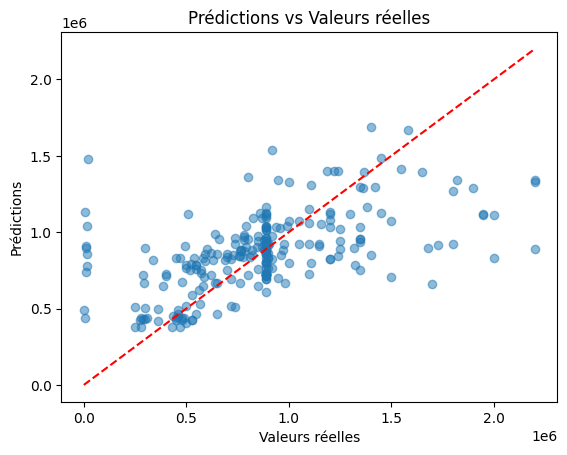

In [2061]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne y=x
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles")
plt.savefig("../eda_img/predictions_vs_reality.png")
plt.show()
